In [1]:
!wget "https://drive.google.com/uc?export=download&id=1746vcBxLaLYr7xc6YdA-27g9MwJa8fqa" -O walmart_data.csv

--2024-05-14 15:41:42--  https://drive.google.com/uc?export=download&id=1746vcBxLaLYr7xc6YdA-27g9MwJa8fqa
Resolving drive.google.com (drive.google.com)... 142.251.167.113, 142.251.167.139, 142.251.167.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1746vcBxLaLYr7xc6YdA-27g9MwJa8fqa&export=download [following]
--2024-05-14 15:41:42--  https://drive.usercontent.google.com/download?id=1746vcBxLaLYr7xc6YdA-27g9MwJa8fqa&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.115.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.115.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [application/octet-stream]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("walmart_data.csv")

In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
df.shape

(550068, 10)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
for i in df.columns:
  print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [8]:
for i in df.columns:
  print(i,":",df[i].isnull().sum())

User_ID : 0
Product_ID : 0
Gender : 0
Age : 0
Occupation : 0
City_Category : 0
Stay_In_Current_City_Years : 0
Marital_Status : 0
Product_Category : 0
Purchase : 0


Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
Inference after computing the average female and male expenses.
Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [9]:
df.groupby(['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

Male customers are more than Female customers in walmart data

In [10]:
df.Gender.value_counts(normalize=True)

Gender
M    0.753105
F    0.246895
Name: proportion, dtype: float64

In [11]:
gen_uni_count=df.groupby('Gender').agg({'User_ID':'nunique'})
gen_uni_count/gen_uni_count.sum()

,User_ID
Gender,
F,0.282804
M,0.717196


In [12]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Male is doing greater purchase

<Axes: xlabel='Gender', ylabel='Purchase'>

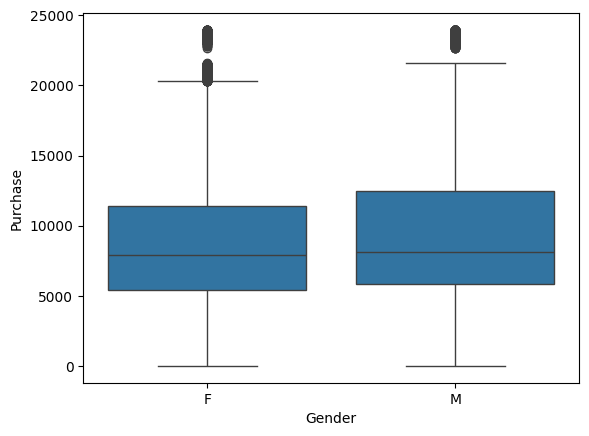

In [13]:
sns.boxplot(df,x='Gender',y='Purchase')

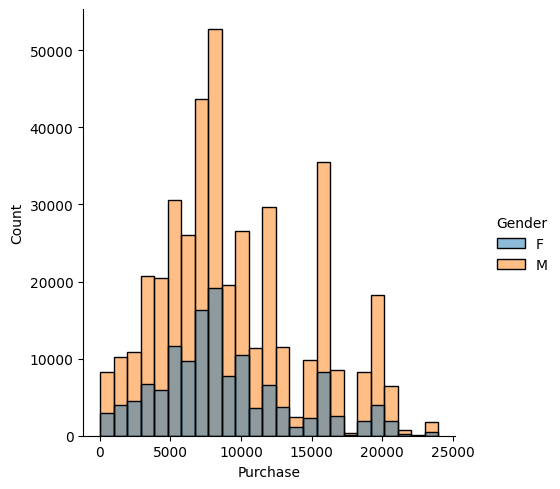

In [14]:
sns.displot(df,x='Purchase',hue='Gender',bins=25)

In [15]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [16]:
df.sample(500).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,130.0,9158.523077,4749.240850,1379.0,5888.0,7898.0,11762.5,20428.0
M,370.0,9832.216216,5022.425685,133.0,6006.0,8688.0,12905.5,20953.0


In [17]:
def clt(data,sample_size=500,number_of_iterations=1000):
  sample_means=[]
  for i in range(number_of_iterations):
    sample=data.sample(sample_size)
    sample_mean=sample.Purchase.mean()
    sample_means.append(sample_mean)
  return sample_means

In [18]:
df_male=df[df['Gender']=='M']

In [19]:
df_female=df[df['Gender']=='F']

In [20]:
mean_of_sample_of_males_500=clt(df_male)
print("mean of sample of males of sample size 500 is ",np.mean(mean_of_sample_of_males_500))

mean of sample of males of sample size 500 is  9439.826008000002


In [21]:
mean_of_sample_of_females_500=clt(df_female)
print("mean of sample of females of sample size 500 is ",np.mean(mean_of_sample_of_females_500))

mean of sample of females of sample size 500 is  8735.810422


mean of sample mean should follow normal distribution

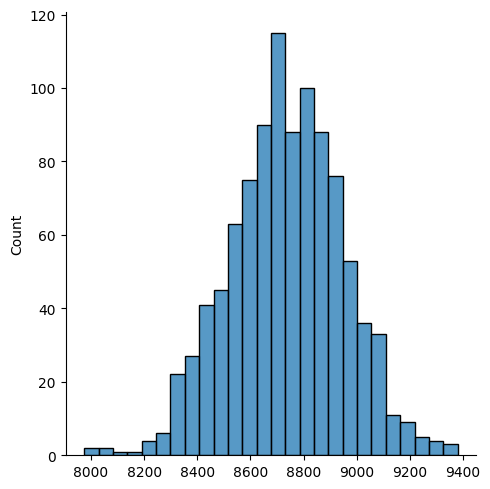

In [22]:
sns.displot(mean_of_sample_of_females_500)

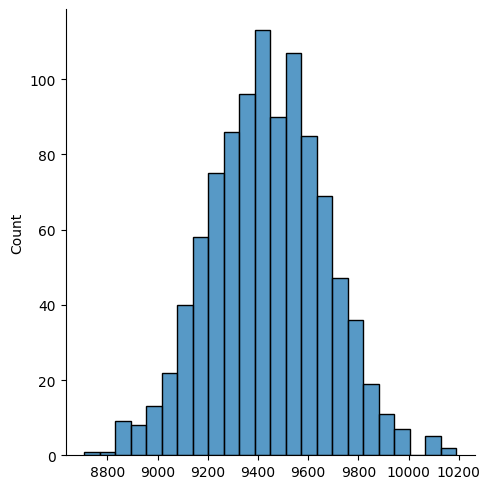

In [23]:
sns.displot(mean_of_sample_of_males_500)

In [24]:
from scipy.stats import shapiro
stat, p = shapiro(mean_of_sample_of_males_500)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.999, p=0.701
Probably Gaussian


In [25]:
from scipy.stats import shapiro
stat, p = shapiro(mean_of_sample_of_females_500)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.998, p=0.371
Probably Gaussian


confidence interval
95%= 1.96
99%=2.58

In [26]:
print('mean_of_samples_of_men_500')
print(np.mean(mean_of_sample_of_males_500)-1.96*(np.std(mean_of_sample_of_males_500)))
print(np.mean(mean_of_sample_of_males_500)+1.96*(np.std(mean_of_sample_of_males_500)))

mean_of_samples_of_men_500
8991.62826415189
9888.023751848114


In [27]:
print('mean_of_samples_of_women_500')
print(np.mean(mean_of_sample_of_females_500)-1.96*(np.std(mean_of_sample_of_females_500)))
print(np.mean(mean_of_sample_of_females_500)+1.96*(np.std(mean_of_sample_of_females_500)))

mean_of_samples_of_women_500
8319.21875426555
9152.40208973445


Male 8983                                 9894
female 8320                   9142

Overlap is there

In [28]:
mean_of_sample_of_males_50000=clt(df_male,sample_size=50000)
mean_of_sample_of_females_50000=clt(df_female,sample_size=50000)
print('mean_of_samples_of_men_50000')
print(np.mean(mean_of_sample_of_males_50000)-1.96*(np.std(mean_of_sample_of_males_50000)))
print(np.mean(mean_of_sample_of_males_50000)+1.96*(np.std(mean_of_sample_of_males_50000)))
print('mean_of_samples_of_women_50000')
print(np.mean(mean_of_sample_of_females_50000)-1.96*(np.std(mean_of_sample_of_females_50000)))
print(np.mean(mean_of_sample_of_females_50000)+1.96*(np.std(mean_of_sample_of_females_50000)))

mean_of_samples_of_men_50000
9395.001578343865
9480.537850696135
mean_of_samples_of_women_50000
8700.577452578067
8766.558238021933




*   Male interval 9394 9479
*   female interval 8702 8766
*   No overlap for sample size 50000


In [29]:
df.Marital_Status.value_counts(normalize=True)

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

In [30]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [31]:
df_user_uni_mar=df.groupby('Marital_Status')['User_ID'].nunique()
df_user_uni_mar/df_user_uni_mar.sum()

Marital_Status
0    0.580037
1    0.419963
Name: User_ID, dtype: float64

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

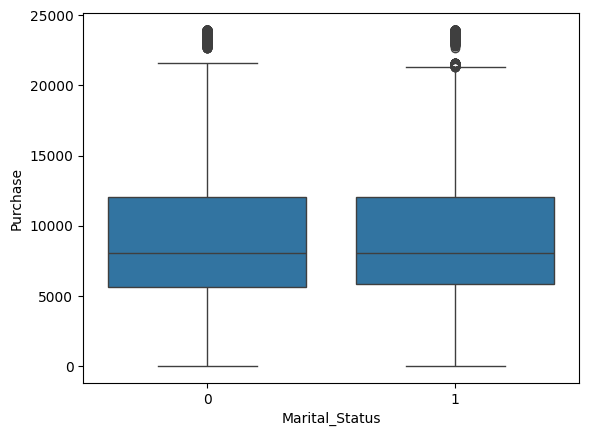

In [32]:
sns.boxplot(df,x='Marital_Status',y='Purchase')

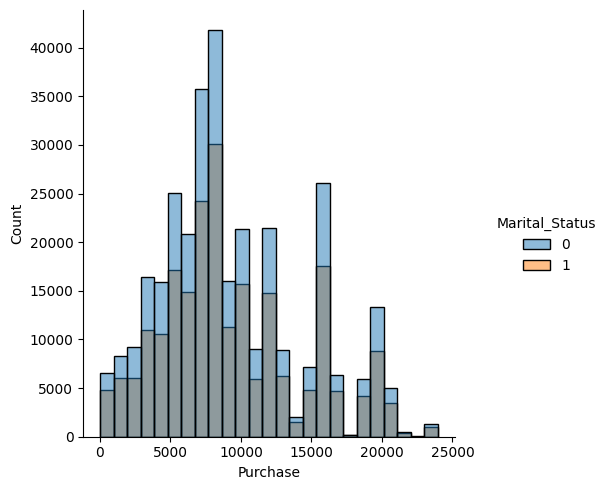

In [33]:
sns.displot(df,x='Purchase',hue='Marital_Status',bins=25)

In [34]:
def clt_Mar_status(data,sample_size=300,number_of_iterations=1000):
  Mar_status_sample_means=[]
  for i in range(number_of_iterations):
    sample_data=data.sample(sample_size)
    sample_mean=sample_data.Purchase.mean()
    Mar_status_sample_means.append(sample_mean)
  return Mar_status_sample_means

In [35]:
df_mar=df[df['Marital_Status']==1]
df_non_mar=df[df['Marital_Status']==0]
df_mar

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
...,...,...,...,...,...,...,...,...,...,...
550060,1006026,P00371644,M,36-45,6,C,1,1,20,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,599
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137


In [36]:
print('mean_of_married_of_sample_300')
mean_of_married_of_sample_300=clt_Mar_status(df_male)

mean_of_married_of_sample_300


In [37]:
print('mean_of_married_of_sample_300')
mean_of_married_of_sample_300=clt_Mar_status(df_mar,sample_size=300)
print(np.mean(mean_of_married_of_sample_300)-1.96*(np.std(mean_of_married_of_sample_300)))
print(np.mean(mean_of_married_of_sample_300)+1.96*(np.std(mean_of_married_of_sample_300)))
print('mean_of_non_married_of_sample_300')
mean_of_non_married_of_sample_300=clt_Mar_status(df_non_mar,sample_size=300)
print(np.mean(mean_of_non_married_of_sample_300)-1.96*(np.std(mean_of_non_married_of_sample_300)))
print(np.mean(mean_of_non_married_of_sample_300)+1.96*(np.std(mean_of_non_married_of_sample_300)))

mean_of_married_of_sample_300
8713.88092006414
9822.295366602524
mean_of_non_married_of_sample_300
8702.638375197314
9849.786098136023


married couple - 8684 ----9830
non married couple = 8686 ----9848

In [38]:
print('mean_of_married_of_sample_50000')
mean_of_married_of_sample_50000=clt_Mar_status(df_mar,sample_size=50000)
print(np.mean(mean_of_married_of_sample_50000)-1.96*(np.std(mean_of_married_of_sample_50000)))
print(np.mean(mean_of_married_of_sample_50000)+1.96*(np.std(mean_of_married_of_sample_50000)))
print('mean_of_non_married_of_sample_50000')
mean_of_non_married_of_sample_50000=clt_Mar_status(df_non_mar,sample_size=50000)
print(np.mean(mean_of_non_married_of_sample_50000)-1.96*(np.std(mean_of_non_married_of_sample_50000)))
print(np.mean(mean_of_non_married_of_sample_50000)+1.96*(np.std(mean_of_non_married_of_sample_50000)))

mean_of_married_of_sample_50000
9220.604941943924
9301.321741416077
mean_of_non_married_of_sample_50000
9224.323290710065
9305.557486169935


In [39]:
df_Age_nUni=df.groupby('Age')['User_ID'].nunique()
df_Age_nUni/df_Age_nUni.sum()

Age
0-17     0.037006
18-25    0.181463
26-35    0.348498
36-45    0.198099
46-50    0.090137
51-55    0.081650
55+      0.063147
Name: User_ID, dtype: float64

Number of customer in the age group between 26 and 35 are more in numbers in the walmart data

In [40]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [41]:
df.sample(300).groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,5.0,9187.600000,2436.658121,6959.0,7185.00,8184.0,11627.00,11983.0
18-25,57.0,8717.070175,5165.469232,740.0,5212.00,8084.0,11998.00,21192.0
26-35,120.0,8346.750000,4634.749935,583.0,5354.25,7173.0,9855.25,23255.0
36-45,62.0,9353.290323,5310.929252,256.0,6054.25,8014.5,15421.75,20392.0
46-50,16.0,8406.125000,5315.784531,1497.0,4507.75,8009.5,10555.50,20327.0
51-55,21.0,9451.714286,4945.027231,488.0,5924.00,8573.0,11476.00,19621.0
55+,19.0,9585.684211,6052.384462,13.0,4745.50,8819.0,15697.00,19444.0


df_age_17=df[df['Age']=='0-17']

In [42]:
df_age_17=df[df['Age']=='0-17']
df_age_25=df[df['Age']=='18-25']
df_age_35=df[df['Age']=='26-35']
df_age_45=df[df['Age']=='36-45']
df_age_50=df[df['Age']=='46-50']
df_age_51=df[((df['Age']=='51-55')|(df['Age']=='55+'))]

In [43]:
#confidence=95%
print('mean_of_age_17_sample_3000')
mean_of_age_17_sample_3000=clt(df_age_17,sample_size=3000)
print(np.mean(mean_of_age_17_sample_3000)-(1.96*(np.std(mean_of_age_17_sample_3000))))
print(np.mean(mean_of_age_17_sample_3000)-(1.96*(np.std(mean_of_age_17_sample_3000))))
print('mean_of_age_25_sample_3000')
mean_of_age_25_sample_30000=clt(df_age_25,sample_size=3000)
print(np.mean(mean_of_age_25_sample_30000)-(1.96*(np.std(mean_of_age_25_sample_30000))))
print(np.mean(mean_of_age_25_sample_30000)-(1.96*(np.std(mean_of_age_25_sample_30000))))
print('mean_of_age_35_sample_3000')
mean_of_age_35_sample_30000=clt(df_age_35,sample_size=3000)
print(np.mean(mean_of_age_35_sample_30000)-(1.96*(np.std(mean_of_age_35_sample_30000))))
print(np.mean(mean_of_age_35_sample_30000)-(1.96*(np.std(mean_of_age_35_sample_30000))))
print('mean_of_age_45_sample_3000')
mean_of_age_45_sample_30000=clt(df_age_45,sample_size=3000)
print(np.mean(mean_of_age_45_sample_30000)-(1.96*(np.std(mean_of_age_45_sample_30000))))
print(np.mean(mean_of_age_45_sample_30000)-(1.96*(np.std(mean_of_age_45_sample_30000))))
print('mean_of_age_50_sample_3000')
mean_of_age_50_sample_30000=clt(df_age_50,sample_size=3000)
print(np.mean(mean_of_age_50_sample_30000)-(1.96*(np.std(mean_of_age_50_sample_30000))))
print(np.mean(mean_of_age_50_sample_30000)-(1.96*(np.std(mean_of_age_50_sample_30000))))
print('mean_of_age_51_sample_3000')
mean_of_age_51_sample_30000=clt(df_age_51,sample_size=3000)
print(np.mean(mean_of_age_51_sample_30000)-(1.96*(np.std(mean_of_age_51_sample_30000))))
print(np.mean(mean_of_age_51_sample_30000)-(1.96*(np.std(mean_of_age_51_sample_30000))))

mean_of_age_17_sample_3000
8759.900922571898
8759.900922571898
mean_of_age_25_sample_3000
8987.970084285384
8987.970084285384
mean_of_age_35_sample_3000
9069.20330248934
9069.20330248934
mean_of_age_45_sample_3000
9159.686820195733
9159.686820195733
mean_of_age_50_sample_3000
9042.361071734887
9042.361071734887
mean_of_age_51_sample_3000
9279.626797645815
9279.626797645815




* No overlap when the sample size is 3000



1.mean_of_age_17_sample_3000 -8772
2.mean_of_age_25_sample_3000 -8992
3.mean_of_age_35_sample_3000 -9065
4.mean_of_age_45_sample_3000 -9146
5.mean_of_age_50_sample_3000 -9044
6.mean_of_age_51_sample_3000 -9289




In [45]:
df.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

No of users in the City Category C is more than other two categories

In [ ]:
#No of users in the City Category C is more when compared with the other Cities categories
#Number of customer in the age group between 26 and 35 are more in numbers in the walmart data
#Highest mean of Purchase from the sample among the age group is for the customers with age 51+
#Non - Married customers are making more purchase in the Walmort
# Sample mean of purchase between Married and Non-married customers are overlapping
# Men has more purchases in the walmart
#Men has more sample mean of purchase for  50000 samples compared with the women
